# Stap 1; Include all the things!

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.tseries.offsets import DateOffset

# Stap 2; get the data

In [23]:
#print(os.path.dirname(os.path.realpath(__file__)) + "/ods001.csv")
#data = pd.read_csv(os.path.dirname(os.path.realpath(__file__)) + "/ods001.csv", sep = ';', parse_dates=['DateTime'])
data = pd.read_csv("ods001.csv", sep = ';', parse_dates=['DateTime'])

# Stap 3; Orient yourself in the data

In [24]:
print(data.head())
print(data.tail())

                    DateTime Resolution code  Total Load
0  2022-01-10 23:45:00+01:00           PT15M         NaN
1  2022-01-10 23:30:00+01:00           PT15M         NaN
2  2022-01-10 23:15:00+01:00           PT15M         NaN
3  2022-01-10 23:00:00+01:00           PT15M         NaN
4  2022-01-10 22:45:00+01:00           PT15M         NaN
                         DateTime Resolution code  Total Load
246427  2015-01-01 01:00:00+01:00           PT15M     9755.00
246428  2015-01-01 00:45:00+01:00           PT15M     9821.78
246429  2015-01-01 00:30:00+01:00           PT15M     9952.87
246430  2015-01-01 00:15:00+01:00           PT15M    10051.28
246431  2015-01-01 00:00:00+01:00           PT15M    10142.19


# Stap 4; Clean the data to the needed data for your model

In [25]:
data = data.iloc[::-1]
data = data.dropna()
data.drop(['Resolution code'], axis = 1,  inplace = True)
data.index = pd.to_datetime(data['DateTime'], utc=True)
data = data.resample('W', label='left').mean()
print(data.head(5))
print(data.columns.values.tolist())

                             Total Load
DateTime                               
2014-12-28 00:00:00+00:00   9791.762268
2015-01-04 00:00:00+00:00  11394.531548
2015-01-11 00:00:00+00:00  11310.602902
2015-01-18 00:00:00+00:00  11736.661667
2015-01-25 00:00:00+00:00  11406.563988
['Total Load']


# Stap 5; Plot it, take a look at how it looks

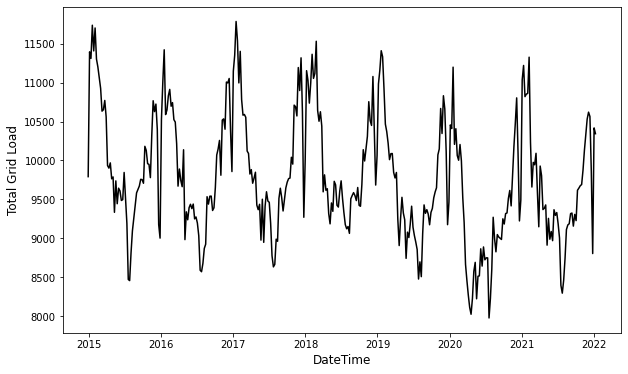

In [26]:
# Define a function to draw time_series plot
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12}) 
    plt.ylabel('Total Grid Load', {'fontsize': 12})
    
dataset = data.copy()
timeseries(data.index, dataset['Total Load'], 'DateTime')

# Stap 6; Make the AI model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18541D+00    |proj g|=  7.03580D-02


 This problem is unconstrained.



At iterate    5    f=  6.16603D+00    |proj g|=  9.01431D-03

At iterate   10    f=  6.16580D+00    |proj g|=  7.09440D-04

At iterate   15    f=  6.16535D+00    |proj g|=  1.43289D-02

At iterate   20    f=  6.15264D+00    |proj g|=  6.34156D-02

At iterate   25    f=  6.13972D+00    |proj g|=  2.16973D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     32      1     0     0   3.613D-06   6.140D+00
  F =   6.1396396634042860     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


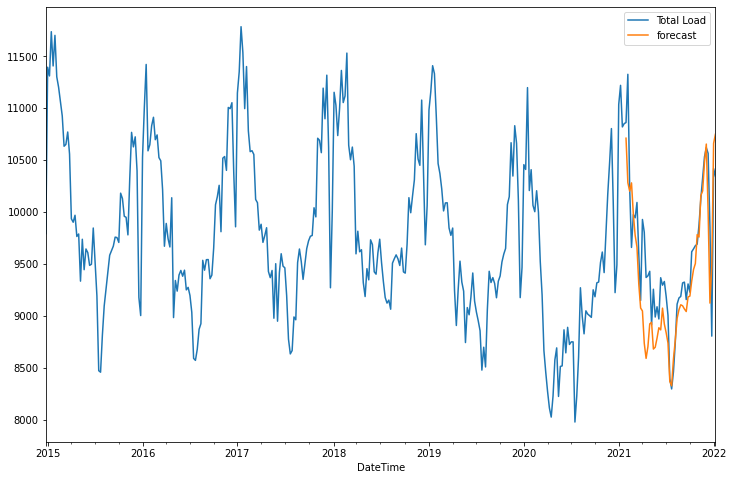

                                     SARIMAX Results                                      
Dep. Variable:                         Total Load   No. Observations:                  368
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -2259.387
Date:                            Tue, 11 Jan 2022   AIC                           4528.775
Time:                                    04:33:46   BIC                           4547.538
Sample:                                12-28-2014   HQIC                          4536.271
                                     - 01-09-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3049      0.062      4.883      0.000       0.182       0.427
ma.L1         -0.8466      0.038   

In [27]:
model = sm.tsa.statespace.SARIMAX(data['Total Load'], order=(1, 1, 1),seasonal_order=(1,1,1,52.17))
results = model.fit()
data['forecast']=results.predict(start=len(data)-50,end=len(data),dynamic=True)
data[['Total Load','forecast']].plot(figsize=(12,8))
plt.plot(data)
plt.show()
print(results.summary())

# Stap 7; Make a test plot

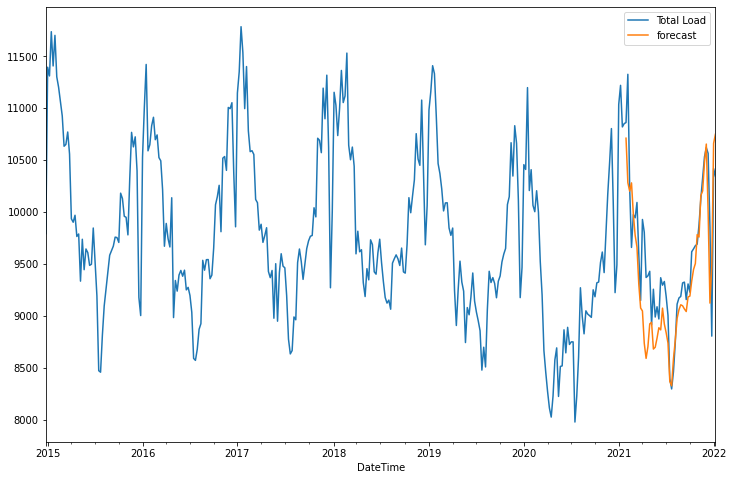

In [28]:
data['forecast']=results.predict(start=len(data)-50,end=len(data),dynamic=True)
data[['Total Load','forecast']].plot(figsize=(12,8))
plt.plot(data)
plt.show()

# Stap 8; Get some statistics

In [ ]:
print(results.summary())

# Step 9; Looks good, now predict the future!

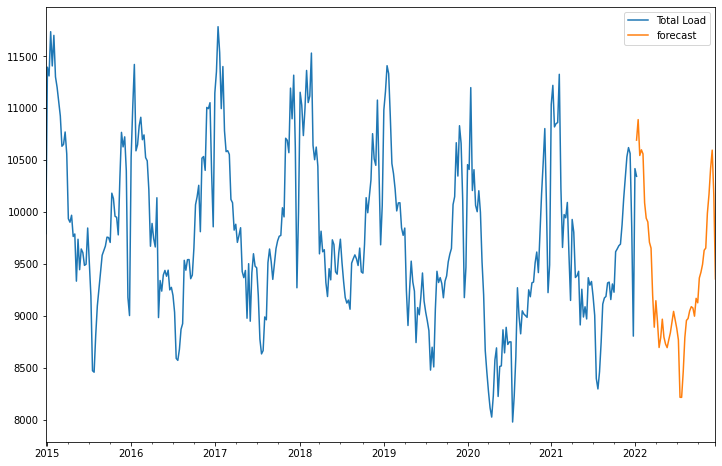

In [29]:
pred_date=[data.index[-1]+ DateOffset(weeks=x) for x in range(0,50)]
pred_date=pd.DataFrame(index=pred_date[1:],columns=data.columns)
data=pd.concat([data,pred_date])
data['forecast']=results.predict(start=len(data)-50,end=len(data),dynamic=True)
data[['Total Load','forecast']].plot(figsize=(12,8))
plt.plot(data)
plt.show()